In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted
import warnings

In [2]:
def wrangle(filepath):
    data= pd.read_csv(filepath)

    return data

In [3]:
df= wrangle("cleaned_merged_heart_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#splitting data
X= df.drop(columns= "target")
y= df['target']
print(X.shape)
print(y.shape)

(1888, 13)
(1888,)


In [5]:
#Train-test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#validation test split
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state= 42)

In [10]:
#Baselining
acc_baseline= y_train.value_counts(normalize= True).max()
print("Baseline accuracy score is: ", acc_baseline.round(2))

Baseline accuracy score is:  0.51


In [17]:
#Iteration phase
model= DecisionTreeClassifier(max_depth=10, random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [18]:
acc_train= accuracy_score(y_train, model.predict(X_train))
acc_val= model.score(X_val, y_val)
print("Training Accuracy: ", round(acc_train,2))
print("Validation Accuracy: ", round(acc_val,2))
#Indicates slight overfitting(.05), can it be reduced?
#Please note that before, I had max_depth set to 6, with training and val scores as 0.9 and .85 respectively

Training Accuracy:  1.0
Validation Accuracy:  0.95


In [14]:
depth_hyperparams= range(1,50,2)

In [15]:
training_acc= []
validation_acc= []
for d in depth_hyperparams:
    test_model= DecisionTreeClassifier(max_depth=d, random_state=42)
    test_model.fit(X_train, y_train)
    training_acc.append(test_model.score(X_train, y_train))
    validation_acc.append(test_model.score(X_val, y_val))

print("Training acc scores: ", training_acc[:3])
print("Validation acc scores: ", validation_acc[:3])


Training acc scores:  [0.7210264900662252, 0.8162251655629139, 0.8758278145695364]
Validation acc scores:  [0.6920529801324503, 0.7814569536423841, 0.8178807947019867]


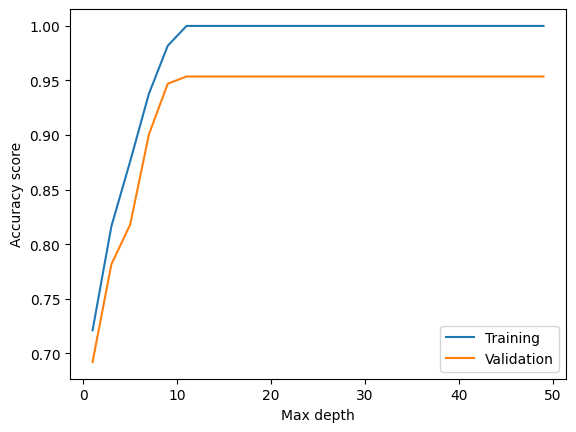

In [16]:
plt.plot(depth_hyperparams, training_acc, label="Training")
plt.plot(depth_hyperparams, validation_acc, label="Validation")
plt.xlabel("Max depth")
plt.ylabel("Accuracy score")
plt.legend();
#Based on the plot, best max_depth is 10, as after that, they both plateau
#Gap starts to widen indicating overfitting starts to occur
#Model has reached full learning potential

In [19]:
#I can now evaluate the model
acc_train= accuracy_score(y_train, model.predict(X_train))
acc_test= model.score(X_test, y_test)
print("Training accuracy: ", round(acc_train, 2))
print("Test accuracy: ", round(acc_test, 2))
#It appears there's an overfitting issue, let me switch to ensemble models

Training accuracy:  1.0
Test accuracy:  0.95
